In [1]:
import pandas as pd
#load the transformed dataset
df_transformed = pd.read_csv('../files/flights_data_preprocessed.csv', index_col=0)
print(f'there are {df_transformed.shape[0]} rows and {df_transformed.shape[1]} columns in the dataset')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_transformed.head(5))

there are 9640 rows and 35 columns in the dataset


,current_flight_time,flight_id,route,aircraft_type,aircraft_mtow_kg,aircraft_malw_kg,aircraft_engine_class,aircraft_num_engines,mach_number,true_airspeed_ms,altitude,flight_level,latitude,longitude,horizontal_speed,vertical_speed,flight_phase,temperature_c,pressure_hpa,wind_speed_u_ms,wind_speed_v_ms,wind_speed_ms,geopotential_height_m,relative_humidity_percent,specific_humidity_kg_kg,total_cloud_cover_octas,high_cloud_cover_octas,global_radiation_w_m2,prob_contrails_percent,direction,departure_airport_lat,arrival_airport_lat,departure_airport_long,arrival_airport_long,contrail_formation
1970-01-01 00:00:00.000243993,2024-09-15 11:56:00,AZ1712,Catania - Rome,A320,78000.133912,65999.903960,Jet,2.0,1.351939,442.284105,2030.417796,FL067,38.752412,14.482614,442.061987,-19.908,descend,-1.612618,705.696157,18.645975,1.184409,18.970808,3533.457433,47.010732,0.004159,4.655547,2.688905,0.000000,0.0,157.112052,37.466801,41.800278,15.066400,12.238889,0
1970-01-01 00:00:00.000506542,2024-09-11 03:12:00,FR123,London - Dublin,B738,79015.726400,66349.169800,Jet,2.0,1.245803,409.905076,2764.445955,FL091,53.104639,-5.514192,409.800712,-19.908,descend,-4.079706,754.390705,13.741032,-10.583979,17.554806,2307.417562,41.635194,0.001656,0.096684,0.000000,0.000000,0.0,345.426028,51.148102,53.421299,-0.190278,-6.270070,0
1970-01-01 00:00:00.000765247,2024-09-11 11:56:00,LH2070,Munich - Hamburg,A319,76499.651576,60999.959344,Jet,2.0,2.301016,733.915220,5862.607036,FL192,52.026251,10.192943,733.915220,-19.908,descend,-21.000640,488.928571,12.734755,2.416738,14.720333,5998.231343,90.596482,0.002255,6.724947,6.406183,7.777825,0.0,342.305970,48.353802,53.630402,11.786100,9.988230,0
1970-01-01 00:00:00.000381750,2024-09-14 17:11:00,DY616,Oslo - Bergen,B738,79015.726400,66349.169800,Jet,2.0,1.787852,574.893999,3491.148440,FL115,60.245753,7.864008,574.298905,-19.908,descend,-9.626323,652.785462,7.306140,8.055187,10.875028,3888.967466,47.431969,0.002278,5.745236,1.098095,285.970078,0.0,269.565138,60.121000,60.293400,11.050200,5.218140,0
1970-01-01 00:00:00.001038182,2024-09-11 07:14:00,VY3922,Barcelona - Palma de Mallorca,A320,78000.133912,65999.903960,Jet,2.0,0.791217,271.084493,154.185826,FL005,39.552588,2.751964,270.743761,-19.908,descend,19.402708,1004.582633,-0.663305,-2.396359,2.497396,344.479832,74.633520,0.010587,1.105509,0.000000,0.000000,0.0,220.167376,41.297100,39.551701,2.078460,2.738810,0


In [3]:
df_transformed['contrail_formation'].value_counts()

contrail_formation
0    1057862
1       4820
Name: count, dtype: int64

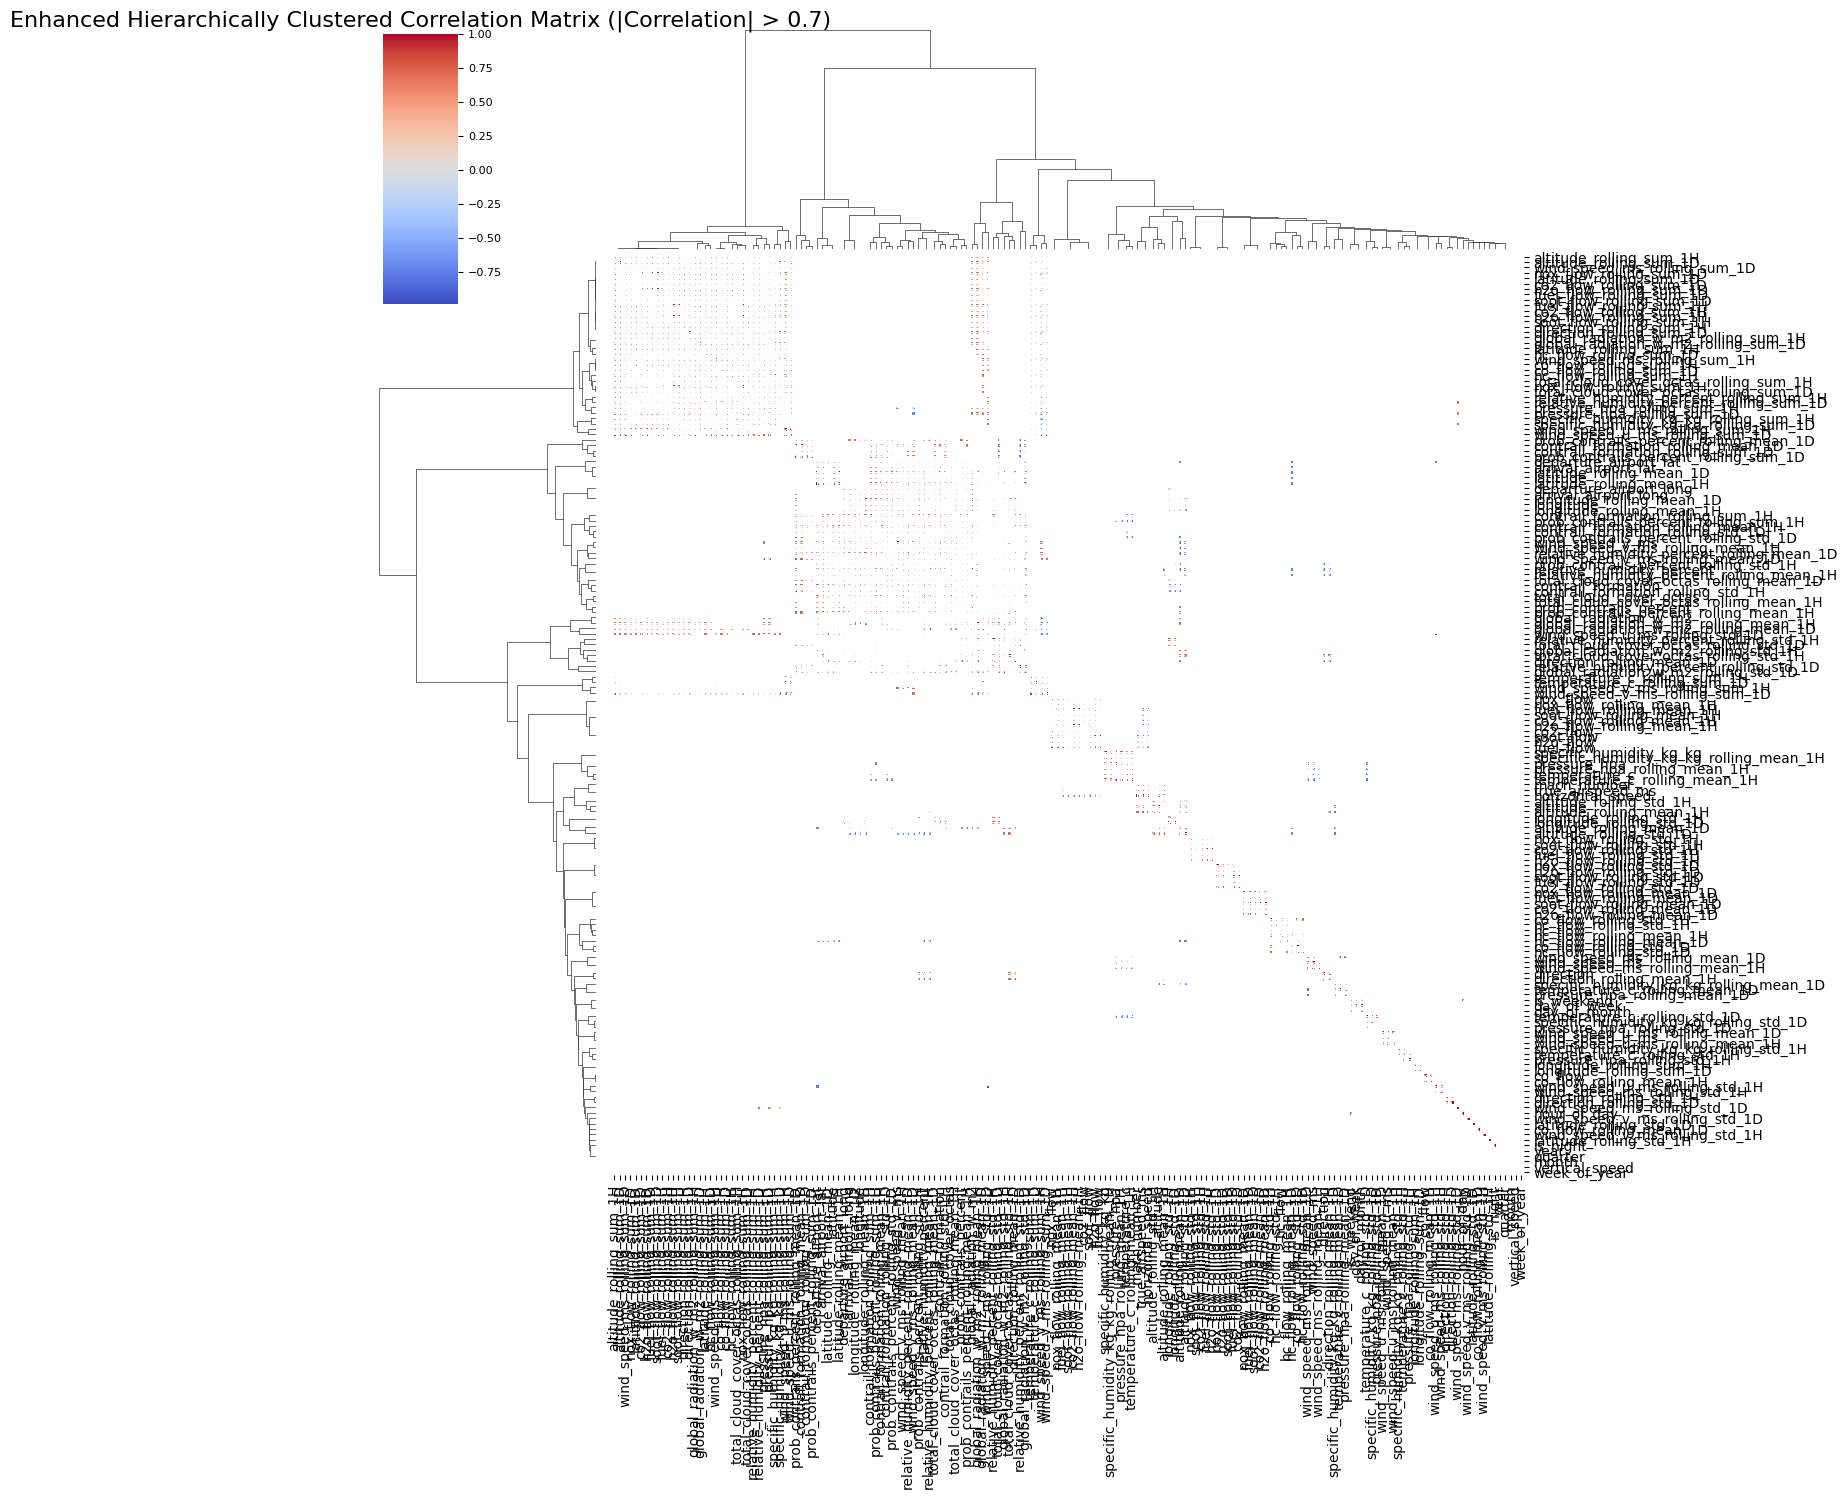

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.cluster import hierarchy

# Drop categorical columns first
categorical_columns = ['route', 'flight_phase']
df_filtered = df_transformed.drop(columns=categorical_columns)

# Compute the correlation matrix
correlation_matrix = df_filtered.corr()

# Filter for high correlations only (|correlation| > 0.7)
filtered_corr_matrix = correlation_matrix.mask(abs(correlation_matrix) < 0.7)

# Use clustering to order the features
linkage = hierarchy.ward(filtered_corr_matrix.fillna(0))  # Replace NaNs with 0 for clustering

# Create a clustermap with better readability options
sns.clustermap(
    filtered_corr_matrix,
    cmap='coolwarm',
    linewidths=0.75,
    annot=True,
    fmt=".2f",
    figsize=(15, 15),  # Adjust figure size for clarity
    method='ward',  # Use Ward's method for clustering
    row_linkage=linkage,  # Apply clustering
    col_linkage=linkage,  # Apply clustering
    cbar_kws={"shrink": 0.8},  # Shrink the color bar size
    annot_kws={"size": 10},  # Increase annotation font size
    xticklabels=True,  # Enable x-tick labels
    yticklabels=True,  # Enable y-tick labels
)

# Set up the plot labels and title for better clarity
plt.xticks(rotation=45, fontsize=8, ha='right')  # Rotate x-axis labels
plt.yticks(fontsize=8)  # Increase y-axis labels font size
plt.title('Enhanced Hierarchically Clustered Correlation Matrix (|Correlation| > 0.7)', fontsize=16)
plt.show()
